In [1]:
# %load /Users/Jonathan/.je.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,6

import json
import re

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [4]:
df.shape

(3000, 23)

In [5]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
# import altair as alt
# from vega_datasets import data
# alt.renderers.enable('notebook')

# source = data.cars()

# iris = data.iris()

# alt.Chart(iris).mark_point().encode(
#     x='petalLength',
#     y='petalWidth',
#     color='species'
# )

In [8]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


#### original_language

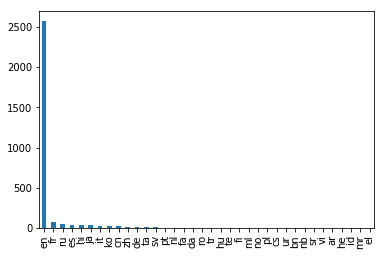

In [9]:
df['original_language'].value_counts().plot(kind='bar')

#### Belongs_to_collection

In [10]:
df['belongs_to_collection'].apply(lambda x: pd.isna(x)).value_counts()
# Convert 'belongs_to_collection' to binary value: is or is not serial movie
df['belongs_to_collection'].fillna(0,inplace=True)
# df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:0 if x==0 else 1)

In [11]:
df['belongs_to_collection'].apply(lambda x:0 if x==0 else 1).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

2396 values are empty (do not belong to collections)

In [12]:
df['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [13]:
# extract the name from the line, return Nan if no line
def get_name(x):
    print(x,type(x))
    if x == 0:
        return np.nan
    else:
        x = str(x)
        x = x.replace('\'','\"')
        print(x)
        return re.findall(r'name\":\s\"(.*?)\"',x)[0]
        #return json.loads(x)[0]['name']

#    print('-->')
    #return re.findall('name\':\s\'(.*?)\',',str(x))[0]
    #return "error"

In [14]:
df['collection_name'] = df['belongs_to_collection'].apply(lambda x: get_name(x))

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}] <class 'str'>
[{"id": 313576, "name": "Hot Tub Time Machine Collection", "poster_path": "/iEhb00TGPucF0b4joM1ieyY026U.jpg", "backdrop_path": "/noeTVcgpBiD48fDjFVic1Vz7ope.jpg"}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}] <class 'str'>
[{"id": 107674, "name": "The Princess Diaries Collection", "poster_path": "/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg", "backdrop_path": "/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 256377, 'name': 'The Muppet Collection', 'poster_path': '/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg', 'backdrop_path': '/1AWd3MM90G47mxtD112gRDxSXY9.jpg'}] <class 'str'>
[{"id": 256377, "name": "The Muppet Collection", "po

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 144200, 'name': 'Swan Princess Series', 'poster_path': '/3qBPAUFUMOOT9KqUEYXWAKy93Ge.jpg', 'backdrop_path': '/wxKt5KHvMYUSLHvyPf2xj64y3dJ.jpg'}] <class 'str'>
[{"id": 144200, "name": "Swan Princess Series", "poster_path": "/3qBPAUFUMOOT9KqUEYXWAKy93Ge.jpg", "backdrop_path": "/wxKt5KHvMYUSLHvyPf2xj64y3dJ.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 366826, 'name': 'Navarone Collection', 'poster_path': '/vCZqWt03pj8Tydt04H12XiJ0NZk.jpg', 'backdrop_path': '/quXPBggya3DoHnxZZ6urOR9e6vR.jpg'}] <class 'str'>
[{"id": 366826, "name": "Navarone Collection", "poster_path": "/vCZqWt03pj8Tydt04H12XiJ0NZk.jpg", "backdrop_path": "/quXPBggya3DoHnxZZ6urOR9e6vR.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 195441, 'name': 'Dennis the Menace Collection', 'poster_path': '/gSJO149uXqwqkTNfCYyj5KnMLW6.jpg',

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 115840, 'name': 'Would I Lie to You? Collection', 'poster_path': '/zHNB1c9ABRWhMknTuUXvz2XtV9B.jpg', 'backdrop_path': '/wJueJlh2mzbZYkjgR7jNBDfIXG6.jpg'}] <class 'str'>
[{"id": 115840, "name": "Would I Lie to You? Collection", "poster_path": "/zHNB1c9ABRWhMknTuUXvz2XtV9B.jpg", "backdrop_path": "/wJueJlh2mzbZYkjgR7jNBDfIXG6.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 89137, 'name': 'How to Train Your Dragon Collection', 'poster_path': '/nJ7ud7XWnNCnGfRQUkUp2t17Sq3.jpg', 'backdrop_path': '/mvcfPkOvgDJG2lEAxTz0NKqoQLo.jpg'}] <class 'str'>
[{"id": 89137, "name": "How to Train Your Dragon Collection", "poster_path": "/nJ7ud7XWnNCnGfRQUkUp2t17Sq3.jpg", "backdrop_path": "/mvcfPkOvgDJG2lEAxTz0NKqoQLo.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 314023, 'name': 'Hercules (Lou Ferrigno) Collection', 'poster_path': '/8u0CHePdPsVPFzDYhZLXtacKl

0 <class 'int'>
[{'id': 142680, 'name': 'Alex Cross Collection', 'poster_path': '/64mlnEVoq1I0BZe4iDdAv89qO9Z.jpg', 'backdrop_path': '/eyKpawn8yMq6kdv03wgKruMuSJX.jpg'}] <class 'str'>
[{"id": 142680, "name": "Alex Cross Collection", "poster_path": "/64mlnEVoq1I0BZe4iDdAv89qO9Z.jpg", "backdrop_path": "/eyKpawn8yMq6kdv03wgKruMuSJX.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}] <class 'str'>
[{"id": 645, "name": "James Bond Collection", "poster_path": "/HORpg5CSkmeQlAolx3bKMrKgfi.jpg", "backdrop_path": "/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 87220, 'name': 'Smokey and the Bandit Collection', 'poster_path': '/XYTaoh3qo6gYvJ8UAtnY9icY2Z.jpg', 'backdrop_path': '/ldGGb98U7ytidfLHY5wKazeB6MO.jpg'}] <class 'str'>
[{"id": 87220, "name": "Smokey and the Bandit Collection", "poster_path": "

In [15]:
df['has_collection'] = df['collection_name'].apply(lambda x: 0 if pd.isna(x) else 1)

In [16]:
df = df.drop('belongs_to_collection',axis = 1)

In [17]:
df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,0
